In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.linalg import norm
import matplotlib.image as mpimg
import os

distinguish Alec from Steve
0 = Alec
1 = Steve

In [5]:
def grad_descent(f, df, x, y, init_t, alpha, EPS=1e-4):
    EPS = 1e-4   #EPS = 10**(-5)
    prev_t = init_t-10*EPS
    t = init_t.copy()
    max_iter = 30000
    iter  = 0
    while norm(t - prev_t) >  EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*df(x, y, t)
        #if iter % 500 == 0:
        #    print "Iter", iter
        iter += 1
    print "Iter", iter
    return t


In [6]:
#load and train data
train_data = np.loadtxt("train_data.txt")
valid_data = np.loadtxt("valid_data.txt")
train_y = np.loadtxt("train_y.txt")
valid_y = np.loadtxt("valid_y.txt")
test_y = np.loadtxt("test_y.txt")
train_data = train_data/256.
valid_data = valid_data/256.

In [7]:
#assume here that x is already flattened
def f(x, y, theta):
    bias = np.ones( (1, x.shape[0])).T
    x = np.vstack( (bias.T, x.T))
    return np.sum((y - np.dot(theta.T, x))**2)
    
def df(x, y, theta):
    bias = np.ones( (1, x.shape[0])).T
    x = np.vstack( (bias.T, x.T))
    return -2*np.sum((y-np.dot(theta.T, x))*x, 1)

In [8]:
#make sure that the gradient descent functino works through finite differencess
h = 0.0001
np.random.seed(0)
theta = np.random.random(32* 32 +1)

test_theta_h =  theta.copy() 
test_theta_h[0] += h
print ((f(train_data, train_y, test_theta_h ) - f(train_data, train_y, theta))/(h))
print df(train_data, train_y, theta) [0]

111854.38020154834
111854.35820852219


In [9]:
np.random.seed(0)
#this is used to create the two differentn types of images, uncomment the one that you dont want
theta0 = np.random.random((32*32 +1))
theta0 = np.zeros_like(theta0)

theta = grad_descent(f, df, train_data, train_y, theta0, 0.00001, EPS=1e-4)

Iter 7230


[0.39899181 0.29958775 0.24561934 0.67736738 0.26899213 0.5821788
 0.57735219 0.48045102 0.51039915 0.43317688]


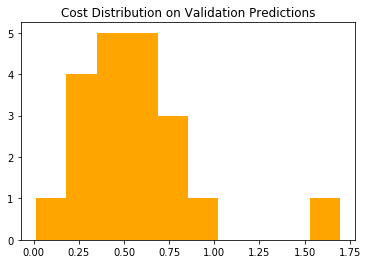

13


In [19]:
#predictions on the validation set, use thetha with each image, and see what answer it gives
preds = np.zeros_like(valid_y)
valid_data_ones = np.concatenate((np.ones((1, valid_data.shape[0])).T, valid_data), axis = 1)
preds = np.dot( valid_data_ones, theta)
print preds[:10]
plt.hist(preds, color = "orange")
plt.title("Cost Distribution on Validation Predictions")
plt.show()
#map preds to binary outputs
preds_binary= np.zeros_like(preds)
preds_binary[preds<0.5] = 0
preds_binary[preds>0.5] = 1
print len(np.where(valid_y ==preds_binary)[0])

[ 0.28289115  0.11183247  0.20492276 -0.00654187  0.10977967  0.13322678
  0.29099036  0.0232449  -0.00654187  0.28450416]
214


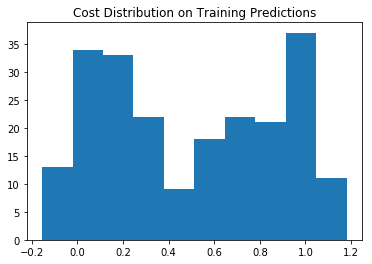

In [18]:
#predictions on the training set, use thetha with each image, and see what answer it gives
preds = np.zeros_like(train_y)
train_data_ones = np.concatenate((np.ones((1, train_data.shape[0])).T, train_data), axis = 1)
preds = np.dot( train_data_ones, theta)
print preds[:10]
#map preds to binary outputs
preds_binary= np.zeros_like(preds)
preds_binary[preds<0.5] = 0
preds_binary[preds>0.5] = 1
print len(np.where(train_y ==preds_binary)[0])
plt.hist(preds)
plt.title("Cost Distribution on Training Predictions")
plt.show()

In [40]:
#need to scale the data to make sure that it works, wont work if the values are too large
#play with the convergence step (3000 when the step is 0.0000001 )
#play around with the epsilon value
#currently 1e-5, ~ 3000 steps if increased to 1-6, then it goes up to ~30000
#decrease to 1e-4, then it drops to less than 105

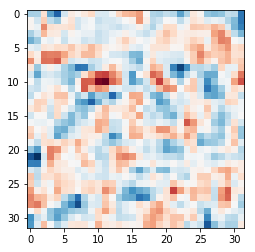

In [41]:
plt.imshow(theta[1:].reshape((32, 32)), cmap="RdBu" )
plt.show()

In [44]:
# retry with just two pics of each different actors
x_2 = np.vstack((train_data[108:110,  :], train_data[110:112, :]))

#this is used to create the two differentn types of images, uncomment the one that you dont want
#theta0 = np.zeros((32*32 +1))
theta0 = np.random.random(32*32 +1)

print  x_2.shape
theta = grad_descent(f, df, x_2, np.asarray([0,0, 1, 1]), theta0, 0.0001)

(4, 1024)
Iter 621


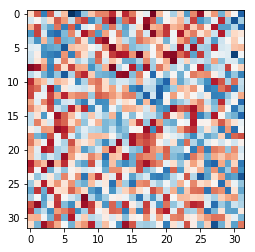

In [45]:
plt.imshow(theta[1:].reshape(32, 32), cmap = "RdBu")
plt.show()

Iter 370
Iter 183
Iter 1


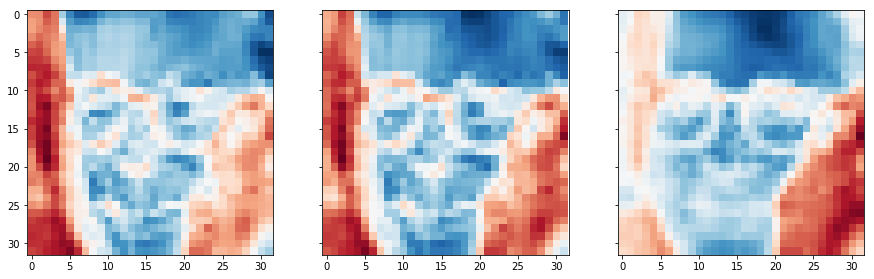

In [46]:
#repeat creating thw two images with different params
fig, axarr = plt.subplots(1,3, sharey=True, figsize = (15, 4.5))
eps = [ 1e-4, 1e-5, 1e-6]
for i, alpha in enumerate(eps):
    #crashes if epsiln is 1e-1 or 1e-2, to big of step sizes
    theta0 = np.zeros(32*32 +1)
    theta = grad_descent(f, df, x_2, np.asarray([0,0,1,1]), theta0,  alpha)
    #plt.figure()
    axarr[i].imshow(theta[1:].reshape(32, 32), cmap = "RdBu")
plt.show()

Now do gender classification

In [19]:
gender_train = np.loadtxt("train_data_6.txt")
gender_train_y = np.loadtxt("train_y_6.txt")
gender_train = gender_train/256.

In [20]:
valid_data = np.loadtxt("valid_data_6.txt")
valid_y = np.loadtxt("valid_y_6.txt")
print valid_y.shape
valid_data = valid_data/256.
#preds = np.zeros_like(valid_y)

(60,)


In [21]:
#test how this model does on the toher 6 actors, do ten pictures of each
test_data = np.loadtxt("new_6_test_data.txt")
test_data = test_data/256.
#test_data = np.hstack((np.ones((60, 1)), test_data ))
#print test_data.shape
test_y = np.concatenate( ( np.ones(30) , np.zeros(30) )  )

In [22]:
# repeat above with different sizes in the data
data_size = np.asarray([55, 110, 165, 220, 275, 330])

#MFMFMF # validation scores
male_data= gender_train[np.r_[0:110, 220:330, 440:550]]
female_data= gender_train[np.r_[110:220, 330:440, 550:]]
scores = np.zeros_like(data_size, dtype=float)
valid_scores = np.zeros_like(scores)
other_6_scores = np.zeros_like(scores)
for i, amount in enumerate(data_size):
    x = np.vstack((male_data[:amount], female_data[:amount]))
    theta0 = np.zeros((32*32 +1))
    theta = grad_descent(f, df, gender_train, gender_train_y, theta0, 0.000002)
    
    pred = np.hstack( (np.ones(( amount*2, 1)), x ))
    preds = np.dot(pred, theta)
    preds_binary= np.zeros_like(preds)
    preds_binary[preds>0.5]=1
    y1 = np.zeros(amount)
    y2 = np.ones(amount)
    y = np.concatenate((y1, y2))
    score = len(np.where(preds_binary==y)[0]) / float(amount)/2.
    print ("how many are correct in training?"), score 
    scores[i] = score 
    
    #validation
    pred = np.hstack( (np.ones(( 60, 1)), valid_data ))
    preds = np.dot(pred, theta)
    #print preds
    preds_binary= np.zeros_like(preds)
    preds_binary[preds>0.5]=1
    score = len(np.where(preds_binary==valid_y)[0]) / 60.
    print ("how many are correct in validataion?"), score 
    valid_scores[i] = score
    
    #other 6 actors 
    pred = np.hstack( (np.ones(( 60, 1)), test_data ))

    preds = np.dot(pred, theta)
    #print preds
    preds_binary= np.zeros_like(preds)
    preds_binary[preds>0.5]=1
    score = len(np.where(preds_binary==test_y)[0]) / 60.
    print ("how many are correct in Testing?"), score 
    other_6_scores[i] = score
    
    #other 6 actors:
    
    #break

Iter 3982
how many are correct in training? 0.818181818182
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75
Iter 3982
how many are correct in training? 0.831818181818
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75
Iter 3982
how many are correct in training? 0.836363636364
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75
Iter 3982
how many are correct in training? 0.822727272727
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75
Iter 3982
how many are correct in training? 0.758181818182
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75
Iter 3982
how many are correct in training? 0.713636363636
how many are correct in validataion? 0.733333333333
how many are correct in Testing? 0.75


In [23]:
print valid_data.shape

(60, 1024)


[ 55 110 165 220 275 330]
[0.81818182 0.83181818 0.83636364 0.82272727 0.75818182 0.71363636]


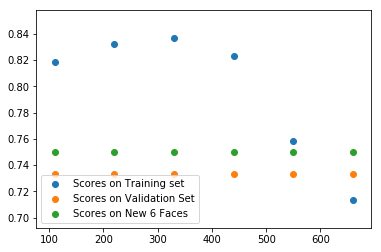

In [25]:
print data_size

print scores
plt.scatter(data_size*2, scores, label ="Scores on Training set")
plt.scatter(data_size*2, valid_scores, label = "Scores on Validation Set")
plt.scatter(data_size*2, other_6_scores, label = "Scores on New 6 Faces")
plt.savefig("overfitting.png")
plt.legend()
plt.show()

In [ ]:
# 